In [189]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale = 2)

In [191]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [192]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [194]:
data["Survived"].sum()

342

- The Age, Cabin and Embarked have null values. I will try to fix them

# How many Survived?

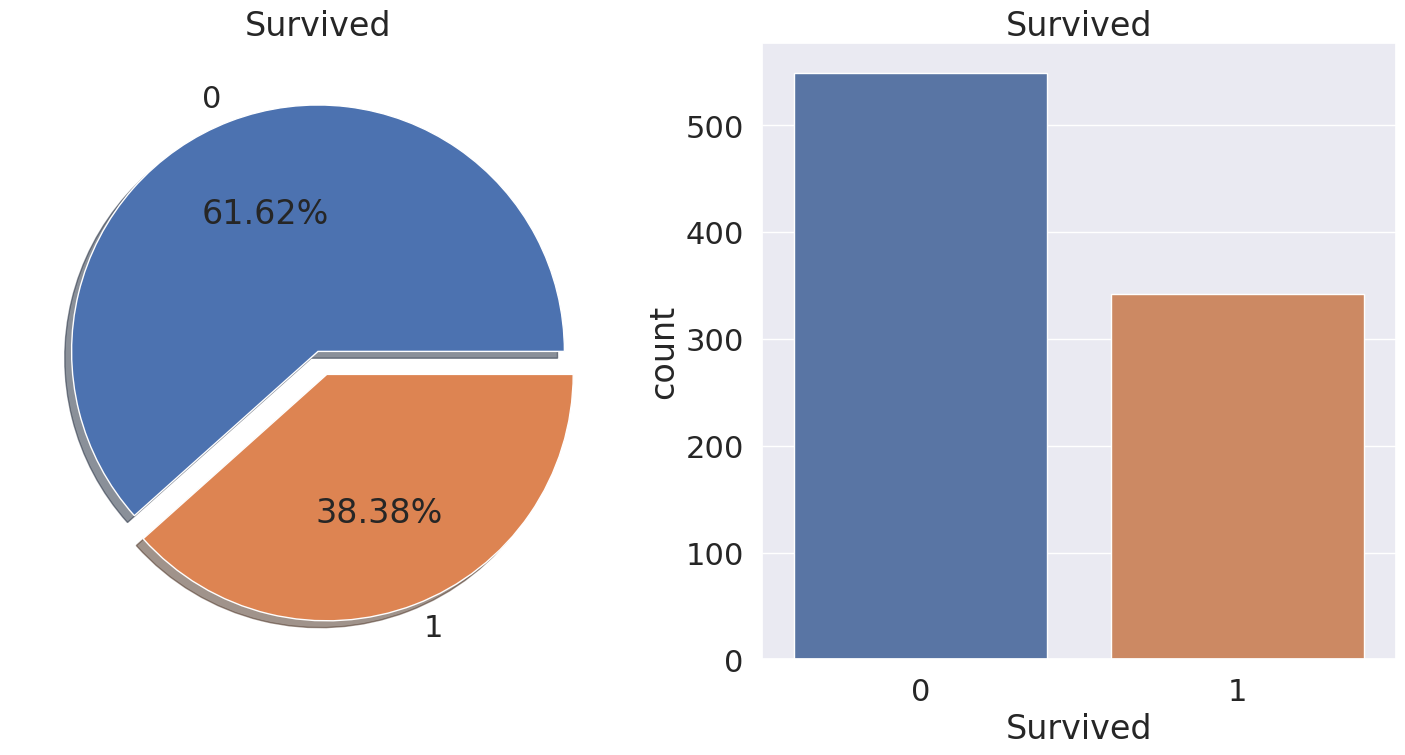

In [195]:

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Replace 'your_dataset' with the actual name of your dataset
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x= 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()


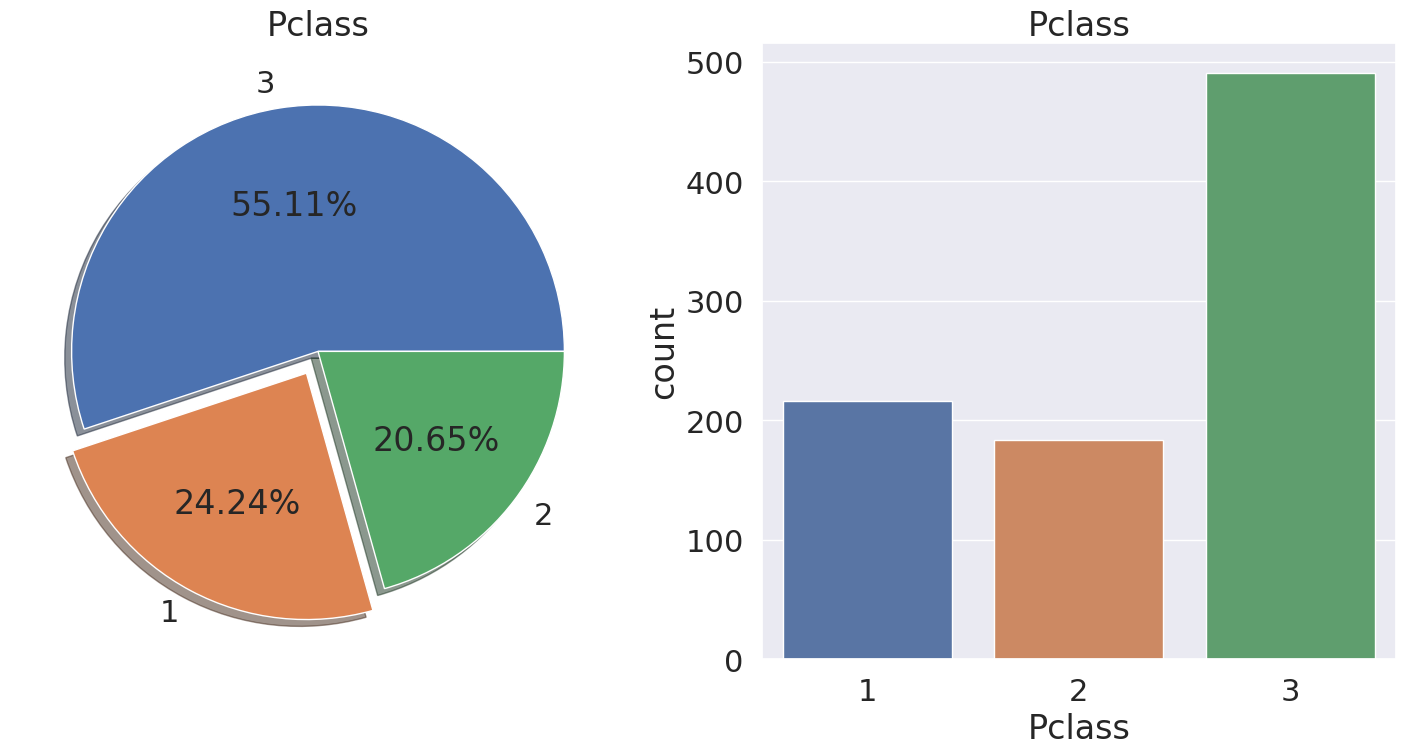

In [196]:

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Replace 'your_dataset' with the actual name of your dataset
data1['Pclass'].value_counts().plot.pie(explode=[0.0, 0.1, 0], autopct='%1.2f%%', ax=ax[0], shadow=True)

ax[0].set_title('Pclass')
ax[0].set_ylabel('')
sns.countplot(x='Pclass', data=data, ax=ax[1])
ax[1].set_title('Pclass')

plt.show()


- It is eveident that not many passengers survived the accidents.
- Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the apssengers did survive and who didn't

- we will try to check the survival rate  by using the diffrent features of the dataset. 

- Some of the features being Sex, Port Of Embarcation, Age, etc. First let us Understand the different types of features




# Types Of Features

## Categorical features
- A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. 
- For example, gender is a categorical variable having two categories (male and female).
- Now we cannot sort or give any ordering to such variables They are also known as **Nominal Variables**

남여

## Ordinal Features:

- An ordinal variable is similar to categorical values.
- but the difference between them is that we can have relative ordering or sorting between the values.
- For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. 
- Here we can hava a relative so rt in the variable

**Ordinal Features in the dataset: Pclass**

## Continous Feature:
- A feature is said to be continous if it can take values between any two points or betwwen the minimum or maximum values in the features column

나이


# Analysing The Feature

## sex --> Categorical Feature

In [197]:
data1.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

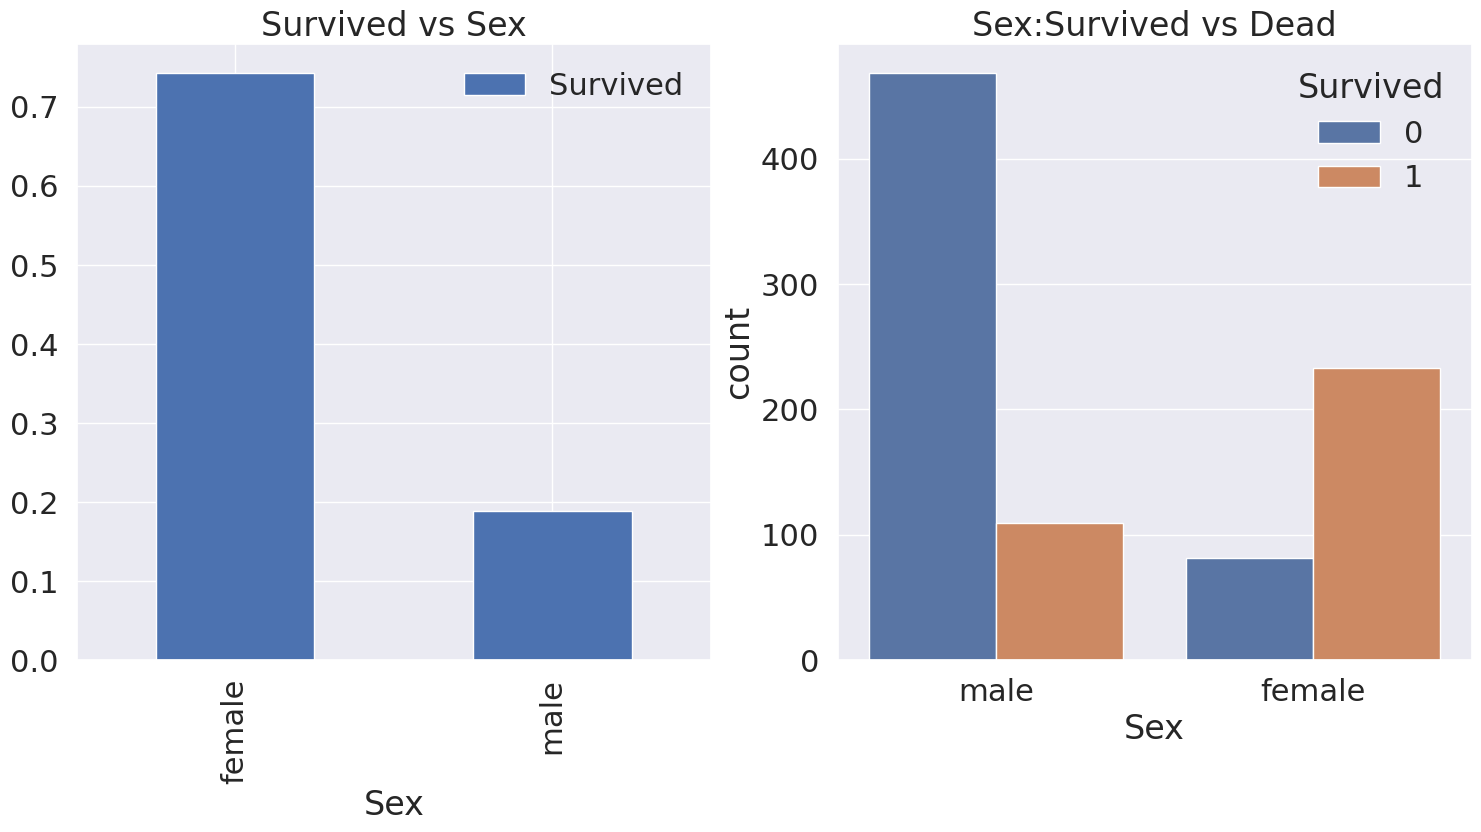

In [198]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x= 'Sex', hue = 'Survived', data = data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- This looks interesting. The number of men on the ship is lot more than the number of women.
- Still the number of women saved is almost twice the number of males saved. - The survival rates for a women on the ship is around 75% while that for men in around 18-19%

- this looks to be a very important feature for modeling. But is it the best??
- Lets check other features

In [199]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [200]:
# Calculate the count of survived passengers for each Pclass
survived_counts = data[data['Survived'] == 1].groupby('Pclass')['Survived'].count()

# Get the count of passengers in Pclass 3
total_count_pclass3 = data[data['Pclass'] == 3].shape[0]

# Calculate the survival rate for Pclass 3
survival_rate_pclass3 = survived_counts[3] / total_count_pclass3

# Print the survival rate
print("Survival rate for Pclass 3:", survival_rate_pclass3)


Survival rate for Pclass 3: 0.24236252545824846


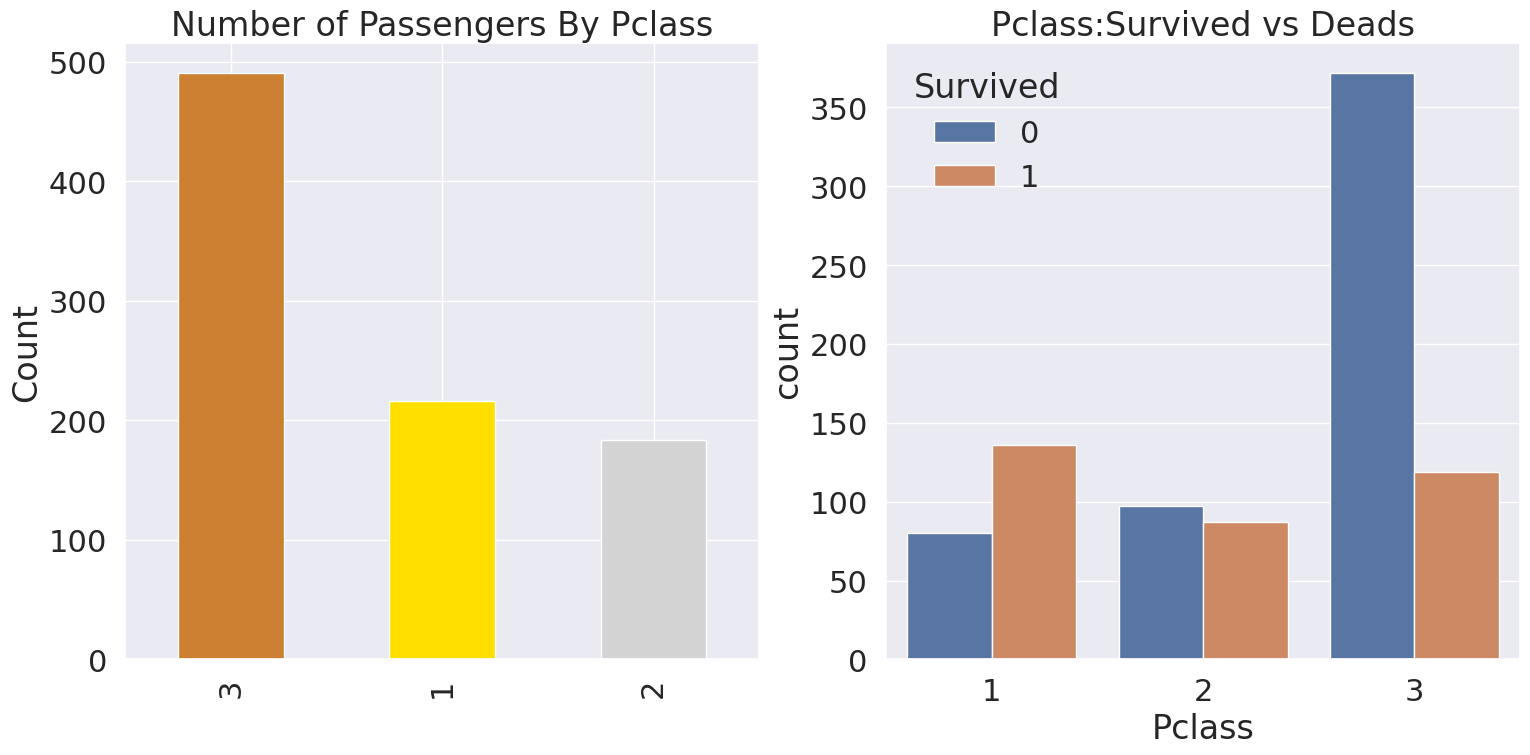

In [201]:
f,ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x= 'Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Deads')
plt.show()

- People say Money Can't Buy Everything. 
- But we can clearly see that Passengers Of Pclass 1 were given a very high priprity while rescue. Even though the the number of Passenger in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

- For Pclass 1% survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistc world.

- Lets Dive in little bit more and check the other interesting observations. Lets check survival rate with Sex and Pclass Together.

In [202]:
pd.crosstab([data['Sex'],data1['Survived']],data1['Pclass'], margins = True).style.background_gradient(cmap='summer_r')

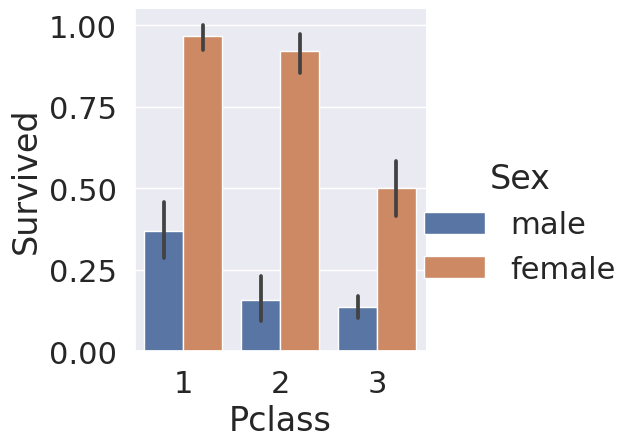

In [203]:
sns.catplot(x= 'Pclass', y= 'Survived', hue ='Sex', data=data, kind = 'bar')

- We use catPlot in this case, because they make the seperation of categorical values easy.

- Looking at the CrossTab and the catPlot, we can easily infer that survival for Women from Pclass1 is about 95-86% as only 3 out of 94 Women from Pclass1 died.

- It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

- Looks like Pclass is also an important feature. Lets analyse other features

In [204]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

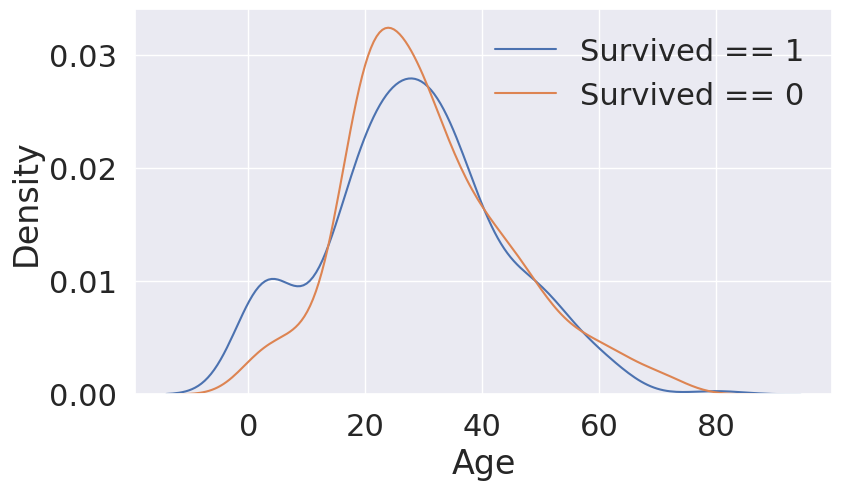

In [205]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(data[data['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(data[data['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

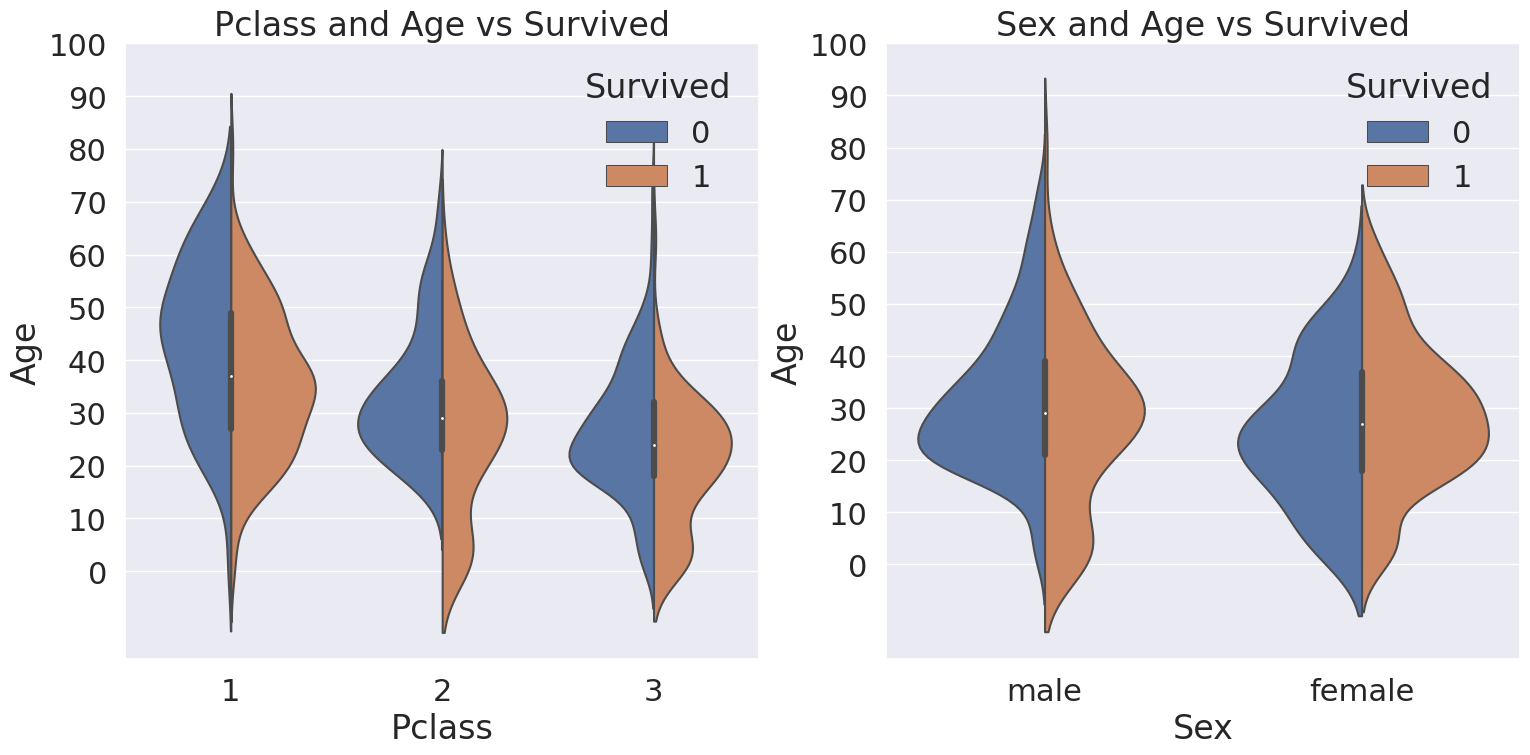

In [206]:
f, ax=plt.subplots(1,2, figsize = (18,8))
sns.violinplot(x= 'Pclass', y= 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x= 'Sex',y= 'Age', hue = 'Survived', data=data, split =True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# Observations:
1) The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2) Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

3) For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace these Nan values, we can ssign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!, we can check the Name feature. Looking upon the feature, we can see that the names have as salutation like Mr or Mrs. Thus we can assign the mean values of Mr and MRs to the respective groups

- What's in A name?

In [207]:
data['Initial'] = 0
for i in data:
        data['Initial'] = data.Name.str.extract('([A-za-z]+)\.')
        # lets extract the Salutations

In [208]:
data['Initial'].tail(50)

841        Mr
842      Miss
843        Mr
844        Mr
845        Mr
846        Mr
847        Mr
848       Rev
849       Mrs
850    Master
851        Mr
852      Miss
853      Miss
854       Mrs
855       Mrs
856       Mrs
857        Mr
858       Mrs
859        Mr
860        Mr
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Initial, dtype: object

- okat so here we are using the Regex: [A-za-z] +)..So what it does is it, it looks for strings which between A-Z or a-z and followed by a.(dot). So we successfilly extract the Initials from the Name.

In [209]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')
# checking the Initials with the sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- okay so there are some missspeeled initials like mile or Mme that stand for Miss. I will repelce them with Miss and same thing other values

In [210]:
data['Initial'].replace(['Mile', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer','Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Other', 'Other','Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [211]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.831081
Mlle      24.000000
Mr        32.739609
Mrs       36.009174
Other     44.600000
Name: Age, dtype: float64

In [212]:
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Master'), 'Age'] = 25
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data['Initial'] == 'other'), 'Age'] = 45

In [213]:
data.isnull().sum(

SyntaxError: incomplete input (426048274.py, line 1)

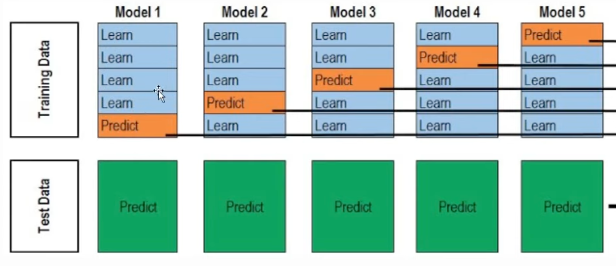